Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [49]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [50]:
import os
BASE_PATH = "/tmp/h-or-s"
happy_image_path = os.path.join(BASE_PATH, "happy")
sad_image_path = os.path.join(BASE_PATH, "sad")

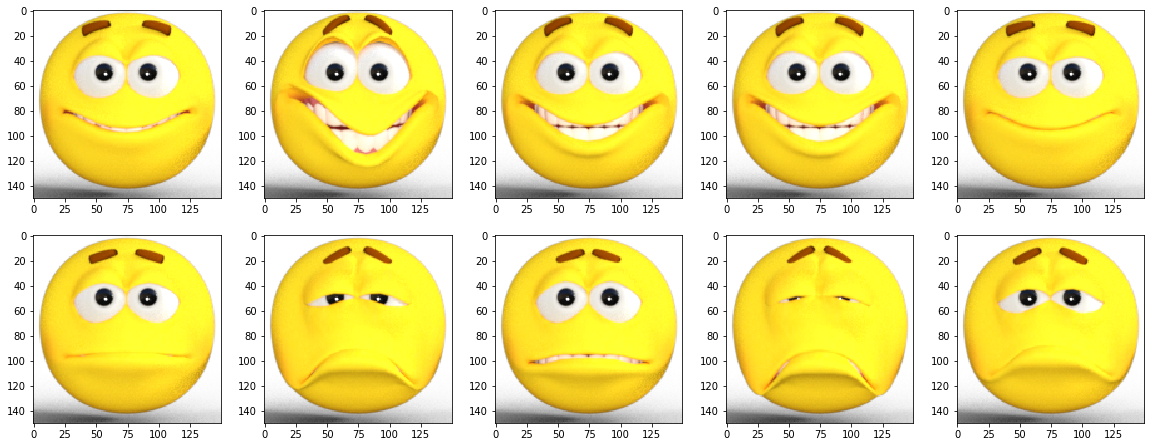

In [51]:
#Visualize only 5 images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

few_happy_img_path = [os.path.join(BASE_PATH, happy_image_path, image_paths)
                      for image_paths in os.listdir(happy_image_path)][0:15:3]

few_sad_img_path = [os.path.join(BASE_PATH, sad_image_path, image_paths)
                    for image_paths in os.listdir(sad_image_path)][0:15:3]

# Define a display figure size
# Get the current figure, if not create a new one
fig = plt.gcf()
n_rows = 5
n_columns = 5
fig.set_size_inches(n_columns * 4, n_rows * 4)

for idx, path in enumerate(few_happy_img_path + few_sad_img_path):
    sp = plt.subplot(n_rows, n_columns, idx +1)
    img = mpimg.imread(path)
    plt.imshow(img)
plt.show()

In [52]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.
    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):# your code):
        def on_epoch_end(self, epoch, logs={}):            
            if(logs.get('acc')>DESIRED_ACCURACY):
                print("\nReached 99.99% accuracy so cancelling training!")
                self.model.stop_training = True
         # Your Code

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([# Your Code Here
        tf.keras.layers.Conv2D(128, (5,5), activation="relu", input_shape=(150,150,3)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (5,5), activation="relu"),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
        tf.keras.layers.MaxPool2D(2,2),       
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')        
    ])
    model.summary()
    from tensorflow.keras.optimizers import RMSprop

    model.compile(# Your Code Here #
        loss='binary_crossentropy',
        optimizer=RMSprop(lr=0.0001),
        metrics=['accuracy'])        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255)# Your Code Here

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory(# Your Code Here)
        BASE_PATH,
        target_size=(150,150),
        batch_size=10,
        class_mode='binary')
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit_generator(# Your Code Here)
        train_generator,
        steps_per_epoch=8,  
        epochs=15,
        verbose=1, callbacks=[callbacks])
    # model fitting
    return history.history['acc'][-1]

In [53]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
train_happy_sad_model()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 146, 146, 128)     9728      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 73, 73, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 69, 69, 64)        204864    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 16384)           

1.0